In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from tqdm import tqdm_notebook

In [ ]:
!ls drive/MyDrive/data/laws/ria_reports_structures/ria_reports_structures

structure_ria_reports_business_profit_loss.csv
structure_ria_reports_business_sizes_as_is.csv
structure_ria_reports_business_sizes_to_be.csv
structure_ria_reports_cancel_duties.csv
structure_ria_reports_expenses.csv
structure_ria_reports_goals.csv
structure_ria_reports_group_changes.csv
structure_ria_reports_group_expenses.csv
structure_ria_reports_groups.csv
structure_ria_reports_kpi.csv
structure_ria_reports_main.csv
structure_ria_reports_necessary_measures.csv
structure_ria_reports_new_functions.csv
structure_ria_reports_notification_info.csv
structure_ria_reports_public_discussion.csv
structure_ria_reports_risks.csv


In [ ]:
!ls drive/MyDrive/data/laws/ria_reports/ria_reports

regulations.csv			      ria_reports_kpi.csv
ria_reports_business_profit_loss.csv  ria_reports_main.csv
ria_reports_business_sizes_as_is.csv  ria_reports_necessary_measures.csv
ria_reports_business_sizes_to_be.csv  ria_reports_new_functions.csv
ria_reports_cancel_duties.csv	      ria_reports_notification_info.csv
ria_reports_expenses.csv	      ria_reports_public_discussion.csv
ria_reports_goals.csv		      ria_reports_risks.csv
ria_reports_group_changes.csv	      sample_submission.csv
ria_reports_group_expenses.csv	      train_answer.csv
ria_reports_groups.csv


In [ ]:
reg = pd.read_csv("drive/MyDrive/data/laws/regulations.csv")
target = pd.read_csv("drive/MyDrive/data/laws/train_answer.csv")

In [ ]:
# убираем удалённые проекты (входят в train)
reg = reg[reg['act_title'] != "Проект удален"]

In [ ]:
# убираем проекты без названий
reg = reg.dropna(subset=['act_title'])

In [ ]:
reg

,id,act_title,publication_date,developer,okved_list,views_num,comments_num,likes_num,dislikes_num,regulatory_impact,added_by,responsible,is_regionally_signigicant,act_changes_controlling_activities,mineco_solution,problem_addressed,act_objectives,persons_affected_by_act,relations_regulated_by_act,act_significance
0,5038,Об утверждении тарифов на услуги по транспорти...,2013-09-11,ФСТ России,NaN,376.0,0.0,0.0,0.0,Низкая,Митина Ольга Викторовна,Митина Ольга Викторовна,False,False,Не определено,NaN,NaN,NaN,NaN,NaN
1,5039,О внесении изменений в отдельные законодательн...,2013-06-11,Минтруд России,Здравоохранение; Предоставление социальных услуг,504.0,0.0,0.0,0.0,Низкая,Рахов Виталий Сергеевич,Павлова Зоя Ивановна,False,False,Не определено,NaN,NaN,NaN,NaN,NaN
2,5040,Об утверждении Положения об уведомлении лиц об...,2013-04-29,Росфинмониторинг,Финансовая деятельность,428.0,0.0,0.0,0.0,Низкая,Тимофеева Алёна Игоревна,Лях Валерий Владимирович,False,False,Не определено,NaN,NaN,NaN,NaN,NaN
3,5041,О внесении изменений в Положение о Министерств...,2013-10-21,Минобрнауки России,Образование,376.0,0.0,0.0,0.0,Низкая,Вотоновская Ирина Вячеславовна,Михайлова Ирина Вячеславовна,False,False,Не определено,NaN,NaN,NaN,NaN,NaN
4,5042,О внесении изменений в Правила подготовки и пр...,2014-02-24,Минприроды России,NaN,499.0,0.0,0.0,0.0,Низкая,Соболева Светлана Юрьевна,Соболева Светлана Юрьевна,False,False,Не определено,предоставление водного объекта в пользование п...,Пунктом 12 части 2 статьи 11 Водного кодекса Р...,неопределенный круг лиц,необходимость корреляции Правил подготовки и п...,Проект постановления Правительства Российской ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85001,120256,"Об использовании средств, поступающих в погаше...",2021-09-10,Минфин России,Финансовая деятельность,24.0,0.0,0.0,0.0,Не определена,Рыбина Ольга Алексеевна,БУГУНАЕВА ДИЛАРА ШАМСУТИНОВ,False,False,Не определено,NaN,NaN,NaN,NaN,NaN
85002,120257,Проект постановления Правительства Российской ...,2021-09-10,Роспотребнадзор,Здравоохранение,40.0,0.0,0.0,0.0,Не определена,Абрамов Юрий Евгеньевич,Абрамов Юрий Евгеньевич,False,False,Не определено,NaN,NaN,NaN,NaN,NaN
85003,120258,О внесении изменений в постановление\nПравител...,2021-09-10,Единый государственный заказчик в сфере строит...,Строительство,11.0,0.0,0.0,0.0,Не определена,Сурин Антон Игоревич,Сурин Антон Игоревич,False,False,Не определено,NaN,NaN,NaN,NaN,NaN
85004,120260,Об утверждении критериев отнесения объектов пр...,2021-09-10,Минэнерго России,"Производство и распределение электроэнергии, г...",13.0,0.0,0.0,0.0,Не определена,Балабаева Анастасия Александровна,Верхов Артем Александрович,False,False,Не определено,NaN,NaN,NaN,NaN,NaN


In [ ]:
import os
for dirname, _, filenames in os.walk('drive/MyDrive/data/laws/ria_reports/ria_reports'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

drive/MyDrive/data/laws/ria_reports/ria_reports/ria_reports_business_profit_loss.csv
drive/MyDrive/data/laws/ria_reports/ria_reports/ria_reports_business_sizes_as_is.csv
drive/MyDrive/data/laws/ria_reports/ria_reports/ria_reports_business_sizes_to_be.csv
drive/MyDrive/data/laws/ria_reports/ria_reports/ria_reports_cancel_duties.csv
drive/MyDrive/data/laws/ria_reports/ria_reports/ria_reports_expenses.csv
drive/MyDrive/data/laws/ria_reports/ria_reports/ria_reports_groups.csv
drive/MyDrive/data/laws/ria_reports/ria_reports/ria_reports_kpi.csv
drive/MyDrive/data/laws/ria_reports/ria_reports/ria_reports_main.csv
drive/MyDrive/data/laws/ria_reports/ria_reports/ria_reports_group_changes.csv
drive/MyDrive/data/laws/ria_reports/ria_reports/ria_reports_goals.csv
drive/MyDrive/data/laws/ria_reports/ria_reports/ria_reports_group_expenses.csv
drive/MyDrive/data/laws/ria_reports/ria_reports/ria_reports_new_functions.csv
drive/MyDrive/data/laws/ria_reports/ria_reports/ria_reports_public_discussion.csv

In [ ]:
import glob
# join them all!
for report_path in tqdm_notebook(glob.glob('drive/MyDrive/data/laws/ria_reports/ria_reports/ria_reports_*.csv*')):
    report = pd.read_csv(report_path, sep=';')
    reg = reg.join(report.drop_duplicates(subset=['regulation_project_id']).set_index('regulation_project_id'), on = 'id', lsuffix='_l', rsuffix='_r')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


  0%|          | 0/16 [00:00<?, ?it/s]

In [ ]:
# заполним все пропуски самыми частыми значениями по колонке, а все строки приведём к нижнему регистру
for i, col in enumerate(reg.columns):
      reg[col] = reg[col].fillna(reg[col].dropna().value_counts().index[0])
      if reg[col].dtype=='object':
        reg[col]=reg[col].apply(lambda x: str(x).lower())

In [ ]:
reg

,id,act_title,publication_date,developer,okved_list,views_num,comments_num,likes_num,dislikes_num,regulatory_impact,added_by,responsible,is_regionally_signigicant,act_changes_controlling_activities,mineco_solution,problem_addressed,act_objectives,persons_affected_by_act,relations_regulated_by_act,act_significance,Содержательные издержки: Описание социально-экономических последствий реализации проекта акта,Содержательные издержки: Единовременные,Содержательные издержки: Периодические,Информационные издержки: Описание социально-экономических последствий реализации проекта акта,Информационные издержки: Единовременные,Информационные издержки: Периодические,Преимущества и (или) иные выгоды: Описание социально-экономических последствий реализации проекта акта,Преимущества и (или) иные выгоды: Единовременные,Преимущества и (или) иные выгоды: Периодические,Оценка структуры регулируемых субъектов по категориям,Количественная (интервальная) оценка,Удельный вес(%),Прогноз количественной динамики структуры регулируемых субъектов по категориям при введении предлагаемого регулирования,Микропредприятия,Малыепредприятия,Средниепредприятия,"Описание отменяемых обязанностей, запретов или ограничений","Описание и оценка затрат на выполнение отменяемых обязанностей, запретов или ограничений","Наименование новой или изменяемой функции, полномочия, обязанности или права",Наименование органа_l,...,kpi: Информация о программах мониторинга и иных способах (методах) оценки достижения заявленных целей регулирования,"kpi: Оценка затрат на осуществление мониторинга (в среднем в год, млн. руб.)",kpi: Описание источников информации для расчета показателей (индикаторов),notification_info: Полный электронный адрес размещения уведомления в информационно-телекоммуникационной сети «Интернет»,"notification_info: Сведения о лицах, предоставивших предложения","notification_info: Сведения о структурных подразделениях разработчика, рассмотревших предоставленные предложения",notification_info: Иные сведения о размещении уведомления,anticorr_expertise: Указать (при наличии) количество поступивших заключений от независимых экспертов (шт.),anticorr_expertise: Выявленные коррупциогенные факторы и их способы устранения,"other_notification_info: Иные необходимые, по мнению разработчика, сведения",other_notification_info: Источники данных,public_discussion: Полный электронный адрес размещения проекта акта в информационно-телекоммуникационной сети «Интернет»,"public_discussion: Сведения о федеральных органах исполнительной власти и представителях предпринимательского сообщества, извещенных о проведении публичных консультаций","public_discussion: Сведения о лицах, представивших предложения","public_discussion: Сведения о структурных подразделениях разработчика, рассмотревших предоставленные предложения",public_discussion: Иные сведения о проведении публичного обсуждения проекта акта,"cancel_duties: Нормативный правовой акт, в котором содержатся отменяемые обязанности, запреты или ограничения",Группа участников отношений_r,"Описание новых преимуществ, обязанностей, ограничений или изменения содержания существующих обязанностей и ограничений",Порядок организации исполнения обязанностей и ограничений,Цели предлагаемого регулирования_r,Установленные сроки достижения целей предлагаемого регулирования,Группа участников отношений,Описание новых или изменения содержания существующих обязанностей и ограничений,Описание и оценка видов расходов (доходов),"Описание новых или изменения существующих функций, полномочий, обязанностей или прав",Порядок реализации,Оценка изменения трудозатрат и (или) потребностей в иных ресурсах,Наименование органа_r,"Срок, в течение которого разработчиком принимались предложения в связи проведением публичного обсуждения проекта акта","Мероприятия, необходимые для достижения целей регулирования",Сроки мероприятий,Описание ожидаемого результата,Объем финансирования,Источники финансирования,Риски решения проблемы предложенным способом и риски негативных последст

In [ ]:
# распарсим дату по дню, месяцу и году раздельно
reg['year'] = reg.publication_date.apply(lambda s: int(s[:4])).astype(int)
reg['month'] = reg.publication_date.apply(lambda s: int(s[5:7])).astype(int)
reg['date'] = reg.publication_date.apply(lambda s: int(s[8:10])).astype(int)
reg.drop(['publication_date'], axis=1, inplace=True)

In [ ]:
# пронумеруем все строковые значения из okved list (разделены запятой)
# и заменим каждый okved_list на список номеров строк, которые есть в этом okved_list
# обычно таких строчек в листе не больше 4
OKVED_DIM = 4
reg['okved_list'] = reg['okved_list'].str.split('; ')
reg['okved_list'] = reg['okved_list'].fillna("").apply(list)
okved_categories = reg['okved_list'].explode().dropna().unique()
okved_mapping = {k: v for v, k in enumerate(okved_categories, 1)}
reg['okved_list'] = reg['okved_list'].apply(lambda x: ([okved_mapping[cat] for cat in x] + [0] * OKVED_DIM)[:OKVED_DIM])

In [ ]:
# а теперь заменим колонку okved_list на 4 колонки, i-ая из которых соответствует i-ому элменту соответствующего полученного в прошлой ячейке массива
for i in range(4):
  reg[f'okved_list_{i}']=reg.okved_list.apply(lambda lst: lst[i])
reg.drop(['okved_list'], axis=1, inplace=True)

In [ ]:
cat_cols=[]
for col in reg.columns:
  if reg[col].dtype=='object':
    cat_cols.append(col)

In [ ]:
reg

,id,act_title,developer,views_num,comments_num,likes_num,dislikes_num,regulatory_impact,added_by,responsible,is_regionally_signigicant,act_changes_controlling_activities,mineco_solution,problem_addressed,act_objectives,persons_affected_by_act,relations_regulated_by_act,act_significance,Содержательные издержки: Описание социально-экономических последствий реализации проекта акта,Содержательные издержки: Единовременные,Содержательные издержки: Периодические,Информационные издержки: Описание социально-экономических последствий реализации проекта акта,Информационные издержки: Единовременные,Информационные издержки: Периодические,Преимущества и (или) иные выгоды: Описание социально-экономических последствий реализации проекта акта,Преимущества и (или) иные выгоды: Единовременные,Преимущества и (или) иные выгоды: Периодические,Оценка структуры регулируемых субъектов по категориям,Количественная (интервальная) оценка,Удельный вес(%),Прогноз количественной динамики структуры регулируемых субъектов по категориям при введении предлагаемого регулирования,Микропредприятия,Малыепредприятия,Средниепредприятия,"Описание отменяемых обязанностей, запретов или ограничений","Описание и оценка затрат на выполнение отменяемых обязанностей, запретов или ограничений","Наименование новой или изменяемой функции, полномочия, обязанности или права",Наименование органа_l,Единовременные расходы в год возникновения,Периодические расходы за период,...,anticorr_expertise: Указать (при наличии) количество поступивших заключений от независимых экспертов (шт.),anticorr_expertise: Выявленные коррупциогенные факторы и их способы устранения,"other_notification_info: Иные необходимые, по мнению разработчика, сведения",other_notification_info: Источники данных,public_discussion: Полный электронный адрес размещения проекта акта в информационно-телекоммуникационной сети «Интернет»,"public_discussion: Сведения о федеральных органах исполнительной власти и представителях предпринимательского сообщества, извещенных о проведении публичных консультаций","public_discussion: Сведения о лицах, представивших предложения","public_discussion: Сведения о структурных подразделениях разработчика, рассмотревших предоставленные предложения",public_discussion: Иные сведения о проведении публичного обсуждения проекта акта,"cancel_duties: Нормативный правовой акт, в котором содержатся отменяемые обязанности, запреты или ограничения",Группа участников отношений_r,"Описание новых преимуществ, обязанностей, ограничений или изменения содержания существующих обязанностей и ограничений",Порядок организации исполнения обязанностей и ограничений,Цели предлагаемого регулирования_r,Установленные сроки достижения целей предлагаемого регулирования,Группа участников отношений,Описание новых или изменения содержания существующих обязанностей и ограничений,Описание и оценка видов расходов (доходов),"Описание новых или изменения существующих функций, полномочий, обязанностей или прав",Порядок реализации,Оценка изменения трудозатрат и (или) потребностей в иных ресурсах,Наименование органа_r,"Срок, в течение которого разработчиком принимались предложения в связи проведением публичного обсуждения проекта акта","Мероприятия, необходимые для достижения целей регулирования",Сроки мероприятий,Описание ожидаемого результата,Объем финансирования,Источники финансирования,Риски решения проблемы предложенным способом и риски негативных последствий,Оценки вероятности наступления рисков,Методы контроля эффективности избранного способа достижения целей регулирования,Степень контроля рисков,"Срок, в течение которого разработчиком принимались предложения в связи с размещением уведомления о подготовке проекта акта",year,month,date,okved_list_0,okved_list_1,okved_list_2,okved_list_3
0,5038,об утверждении тарифов на услуги по транспорти...,фст россии,376.0,0.0,0.0,0.0,низкая,митина ольга викторовна,митина ольга викторовна,False,False,не определено,изменения во фгос,изменения во фгос,росреестр,изменения во фгос,федеральный

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 12 kB/s 


In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

In [ ]:
X = reg.set_index('id').join(target.set_index('id'))

In [ ]:
X_test = X.loc[X.passed.isna()]
X = X.dropna(subset=['passed'])

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X.drop(['passed'], axis=1), X.passed, test_size=0.3, random_state=42)

In [ ]:
# запустим катбуст, параметры искались ранее по сетке
model = CatBoostClassifier(l2_leaf_reg=7, learning_rate=0.1, cat_features=cat_cols, n_estimators=1000)

In [ ]:
model.fit(X_train, y_train, cat_features=cat_cols)

0:	learn: 0.6118278	total: 739ms	remaining: 12m 18s
1:	learn: 0.5376654	total: 2.07s	remaining: 17m 14s
2:	learn: 0.4780999	total: 3.35s	remaining: 18m 31s
3:	learn: 0.4400368	total: 4.85s	remaining: 20m 7s
4:	learn: 0.4111524	total: 6.37s	remaining: 21m 8s
5:	learn: 0.3858753	total: 7.06s	remaining: 19m 29s
6:	learn: 0.3631377	total: 8.16s	remaining: 19m 17s
7:	learn: 0.3460823	total: 9.32s	remaining: 19m 15s
8:	learn: 0.3328759	total: 10.8s	remaining: 19m 50s
9:	learn: 0.3221874	total: 11.9s	remaining: 19m 40s
10:	learn: 0.3151997	total: 13s	remaining: 19m 24s
11:	learn: 0.3082609	total: 14s	remaining: 19m 10s
12:	learn: 0.3038914	total: 14.4s	remaining: 18m 12s
13:	learn: 0.2984910	total: 16s	remaining: 18m 45s
14:	learn: 0.2927742	total: 17.6s	remaining: 19m 14s
15:	learn: 0.2876685	total: 19s	remaining: 19m 25s
16:	learn: 0.2835829	total: 20.2s	remaining: 19m 28s
17:	learn: 0.2812332	total: 21.9s	remaining: 19m 54s
18:	learn: 0.2785746	total: 23.3s	remaining: 20m 3s
19:	learn: 0.2

In [ ]:
y_train_predicted = model.predict_proba(X_train)[:, 1]
y_val_predicted = model.predict_proba(X_val)[:, 1]

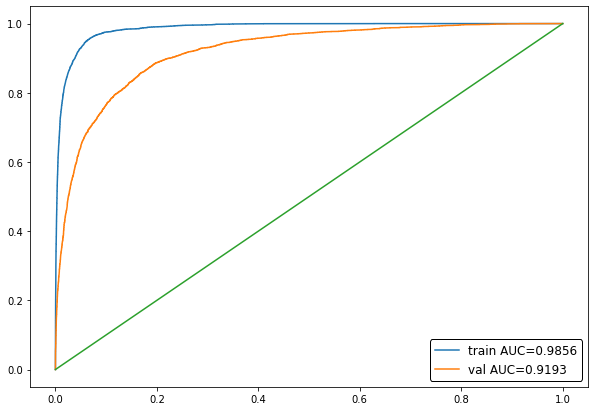

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

train_auc = roc_auc_score(y_train, y_train_predicted)
val_auc = roc_auc_score(y_val, y_val_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_val, y_val_predicted)[:2], label='val AUC={:.4f}'.format(val_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

In [ ]:
model = CatBoostClassifier(l2_leaf_reg=7, learning_rate=0.1, cat_features=cat_cols, n_estimators=1000)

In [ ]:
model.fit(X.drop(['passed'], axis=1), X.passed, cat_features=cat_cols)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

0:	learn: 0.6084400	total: 556ms	remaining: 9m 15s
1:	learn: 0.5290971	total: 1.33s	remaining: 11m 4s
2:	learn: 0.4799541	total: 2.47s	remaining: 13m 41s
3:	learn: 0.4299990	total: 3.85s	remaining: 15m 59s
4:	learn: 0.3960819	total: 5.08s	remaining: 16m 51s
5:	learn: 0.3707094	total: 6.37s	remaining: 17m 35s
6:	learn: 0.3517123	total: 7.37s	remaining: 17m 25s
7:	learn: 0.3383043	total: 7.91s	remaining: 16m 21s
8:	learn: 0.3270429	total: 9.8s	remaining: 17m 58s
9:	learn: 0.3158848	total: 12s	remaining: 19m 46s
10:	learn: 0.3074880	total: 13.4s	remaining: 20m 4s
11:	learn: 0.3001430	total: 14.8s	remaining: 20m 18s
12:	learn: 0.2927126	total: 16.6s	remaining: 20m 57s
13:	learn: 0.2870338	total: 18.8s	remaining: 22m 1s
14:	learn: 0.2822780	total: 20.4s	remaining: 22m 22s
15:	learn: 0.2789422	total: 22.3s	remaining: 22m 51s
16:	learn: 0.2763827	total: 24.5s	remaining: 23m 37s
17:	learn: 0.2735232	total: 26.4s	remaining: 23m 59s
18:	learn: 0.2717759	total: 28.7s	remaining: 24m 40s
19:	learn:

In [ ]:
result = model.predict_proba(X_test)

In [ ]:
submission = pd.read_csv('drive/MyDrive/data/laws/sample_submission.csv')

In [ ]:
submission.id = X_test.index

In [ ]:
submission.passed=result

In [ ]:
submission.passed = 1-submission.passed

In [ ]:
submission.loc[submission.passed>0.7]

,id,passed
33,5871,0.729387
37,5981,0.782894
47,6202,0.874554
49,6216,0.930027
55,6343,0.755081
...,...,...
3574,112404,0.958282
3575,112405,0.774869
3713,114891,0.895192
3719,114992,0.797206


In [ ]:
submission.to_csv('my_submission.csv', index=False)